## Inastlling Required Libraries

In [1]:
!pip install yfinance

## Libraries

In [2]:
import pandas as pd

import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import pickle

In [3]:
end=datetime.now()
start= datetime(end.year-25,end.month,end.day)

## Downloading Stock Data

In [4]:
stock_id = 'TSLA'

In [5]:
tesla_data = yf.download(stock_id,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3599 entries, 2010-06-29 to 2024-10-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3599 non-null   float64
 1   High       3599 non-null   float64
 2   Low        3599 non-null   float64
 3   Close      3599 non-null   float64
 4   Adj Close  3599 non-null   float64
 5   Volume     3599 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.8 KB


In [8]:
tesla_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## Data Analysis

In [9]:
def graphs(figsize,values,col):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel("years")
  plt.ylabel(col)
  plt.title(f'{col} of Tesla Data')

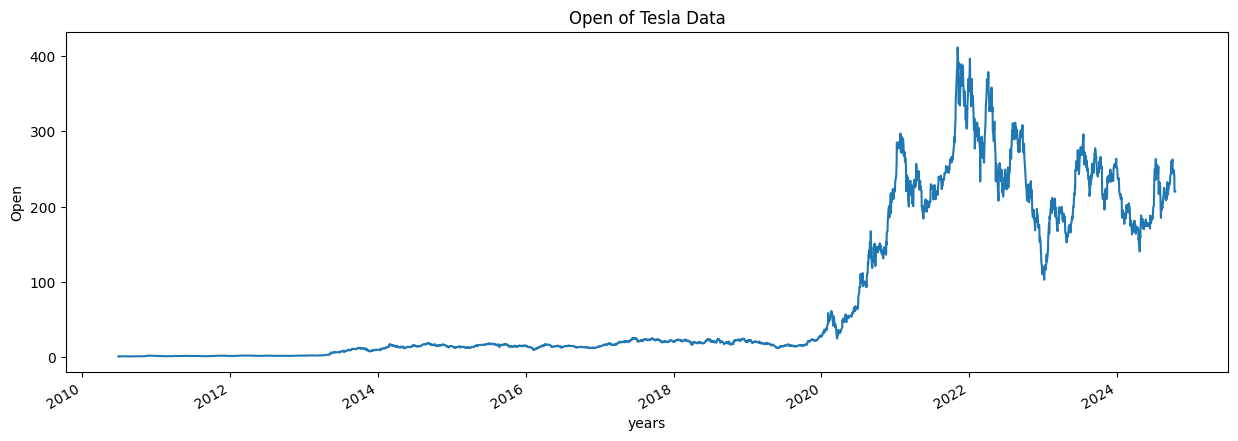

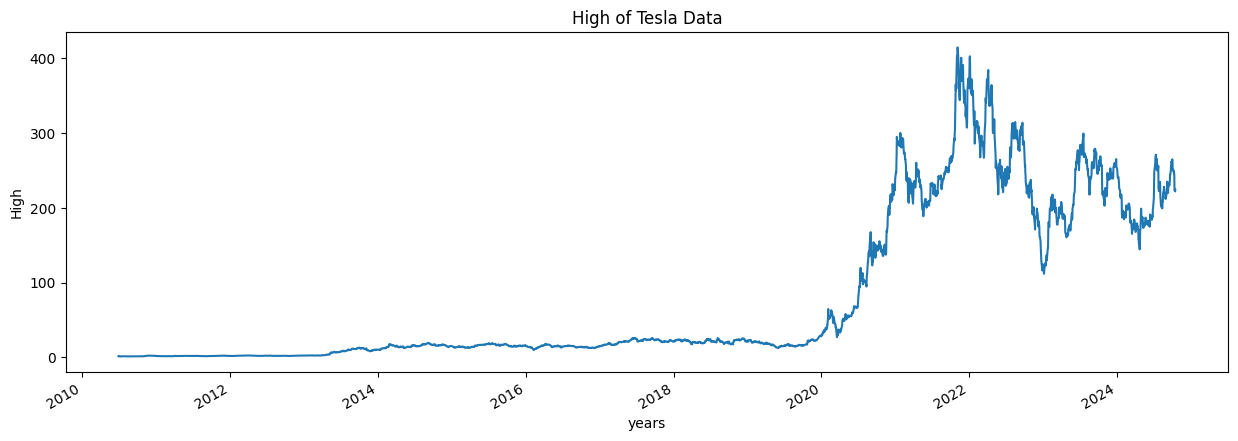

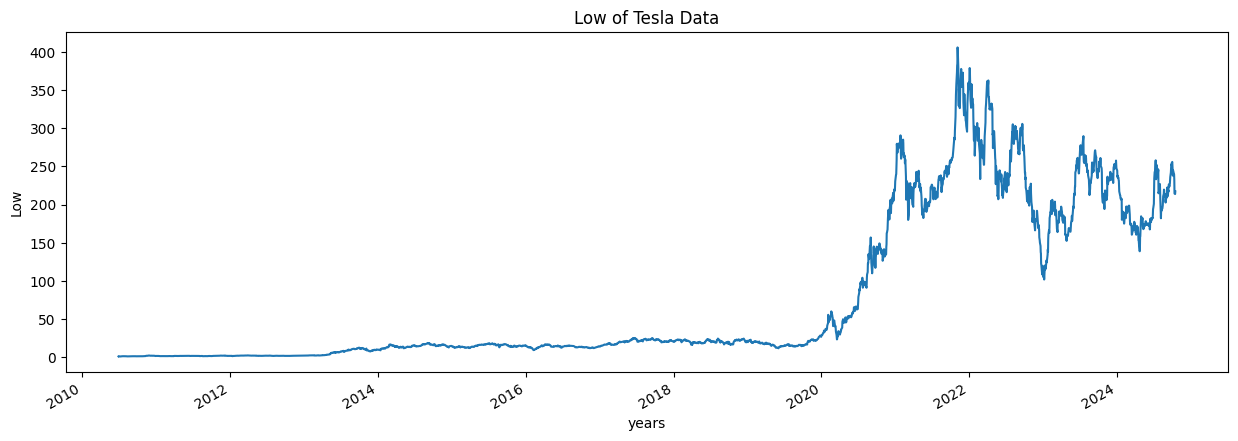

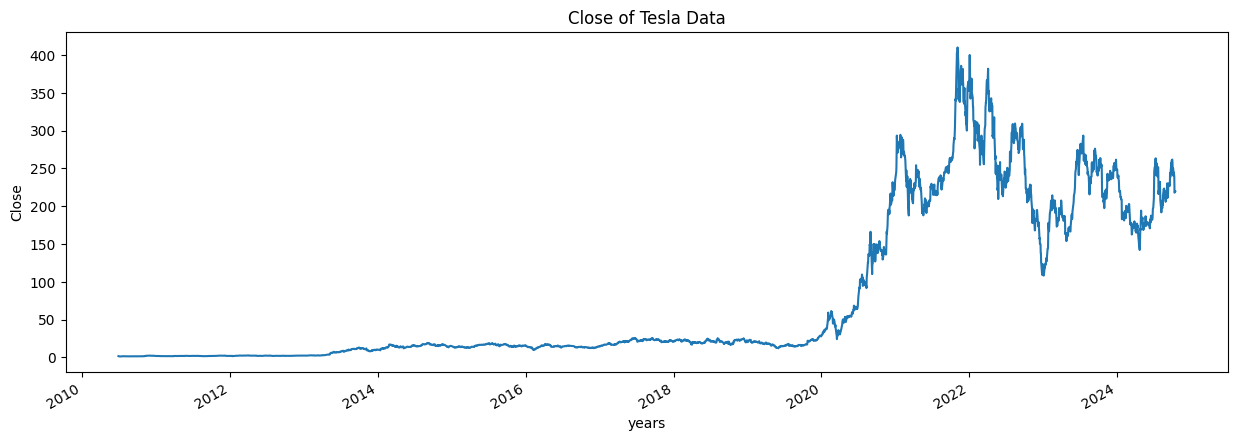

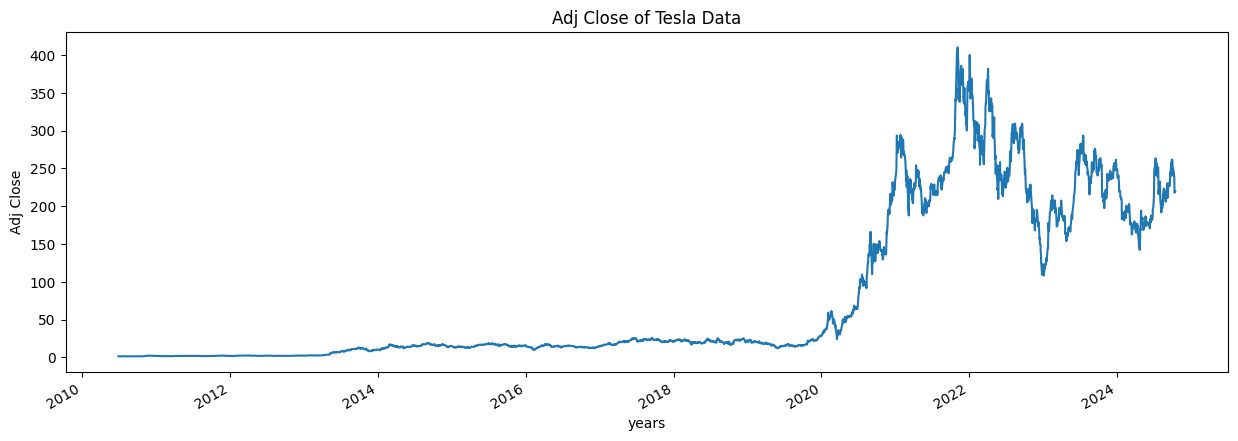

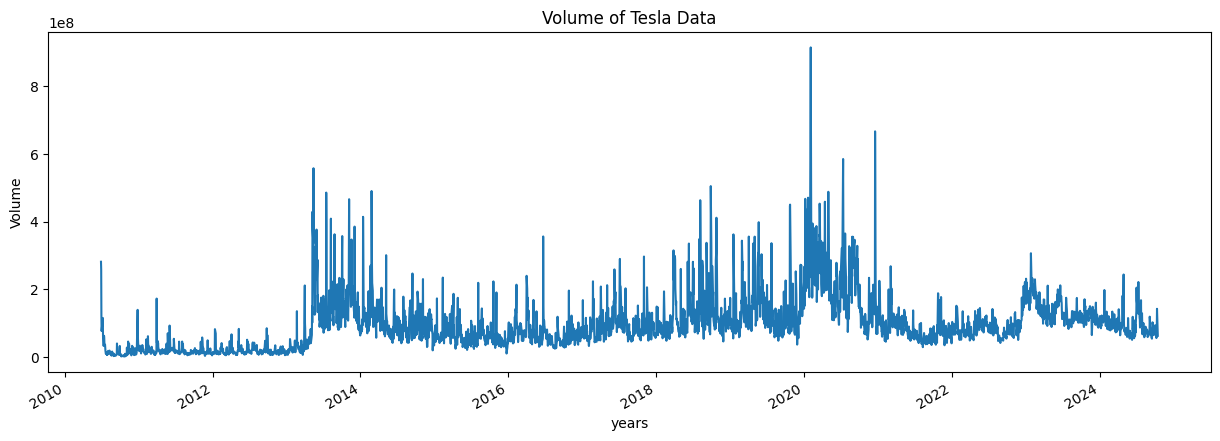

In [10]:
for i in tesla_data.columns:
  graphs((15,5),tesla_data[i],i)

In [11]:
for i in range(2010,2025):
  print(i,list(tesla_data.index.year).count(i))

2010 130
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 199


In [12]:
tesla_data['Moving_Average(250)'] = tesla_data['Adj Close'].rolling(250).mean()

In [13]:
tesla_data['Moving_Average(100)'] = tesla_data['Adj Close'].rolling(100).mean()

In [14]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Average(250),Moving_Average(100)
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN


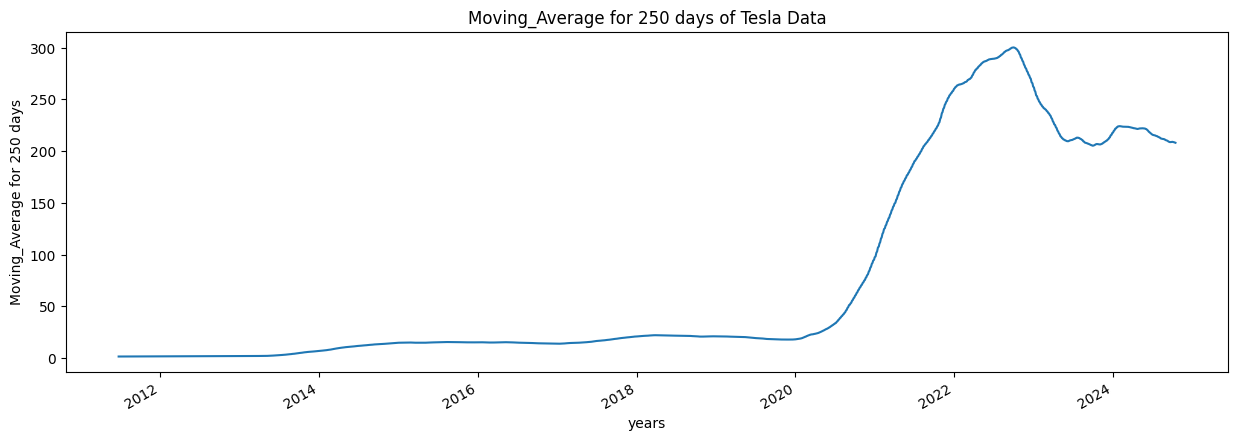

In [15]:
graphs((15,5),tesla_data['Moving_Average(250)'],'Moving_Average for 250 days')

<Figure size 640x480 with 0 Axes>

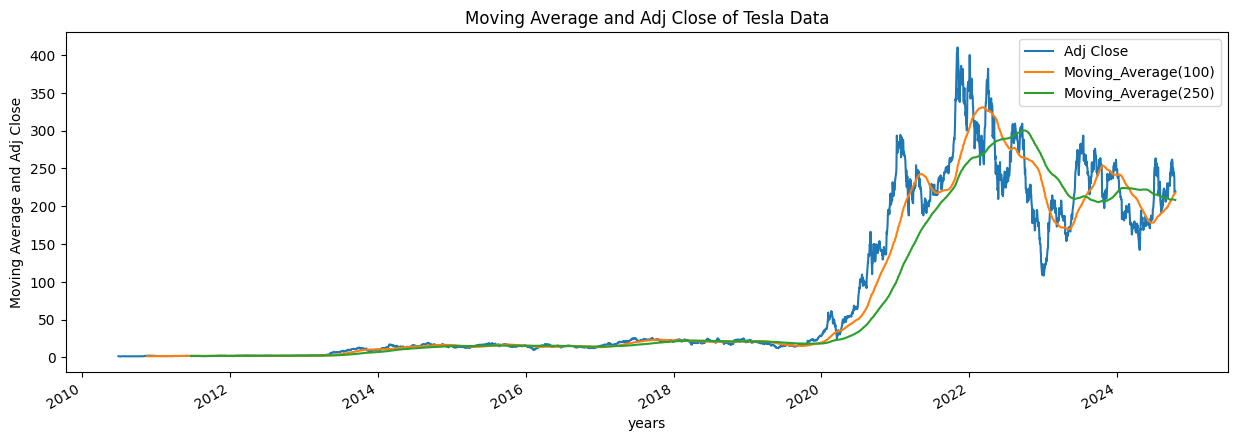

In [16]:
graphs((15,5),tesla_data[['Adj Close','Moving_Average(100)','Moving_Average(250)']],'Moving Average and Adj Close')

In [17]:
tesla_data['Percentage_Change_in_Adj_Close']=tesla_data['Adj Close'].pct_change()
tesla_data[['Percentage_Change_in_Adj_Close']].head()

,Percentage_Change_in_Adj_Close
Date,
2010-06-29,NaN
2010-06-30,-0.002511
2010-07-01,-0.078473
2010-07-02,-0.125683
2010-07-06,-0.160937


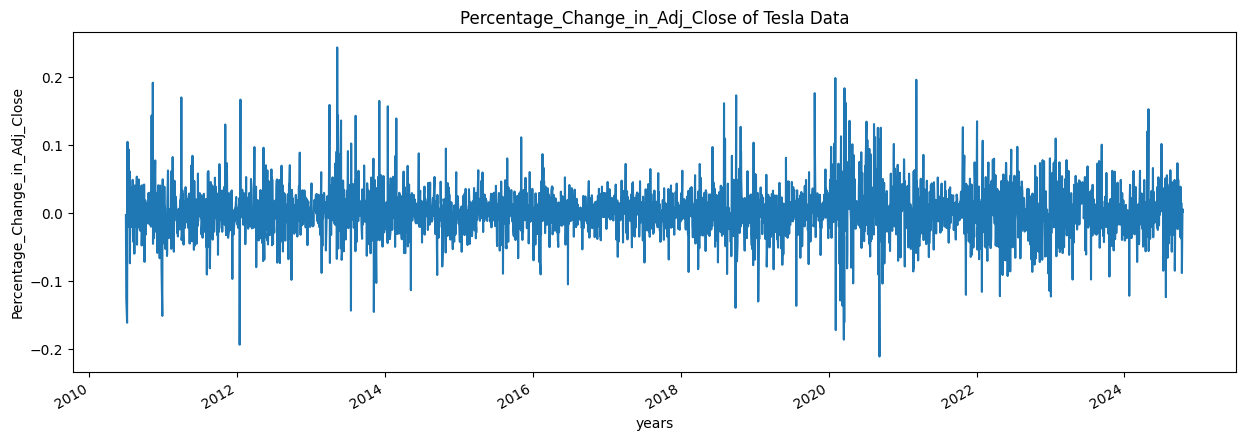

In [18]:
graphs((15,5),tesla_data['Percentage_Change_in_Adj_Close'],'Percentage_Change_in_Adj_Close')

## Data Preprocessing

In [19]:
price = tesla_data[['Adj Close']]

In [20]:
price.head()

,Adj Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_price = scaler.fit_transform(price)
scaled_price

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.53005095],
       [0.53337682],
       [0.53437947]])

In [22]:
max = len(scaled_price)
max

3599

In [23]:
x=[]
y=[]
for i in range(100,max):
  x.append(scaled_price[i-100:i])
  y.append(scaled_price[i])

x,y = np.array(x),np.array(y)

In [24]:
x.shape

(3499, 100, 1)

In [25]:
x.shape

(3499, 100, 1)

In [26]:
y.shape

(3499, 1)

In [27]:
y[0]

array([0.00229713])

## Splitting data into training and test dataset

In [28]:
split = int(len(x)*0.7)
x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2449, 100, 1), (2449, 1), (1050, 100, 1), (1050, 1))

In [31]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1)) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [33]:
model.fit(x_train,y_train,batch_size=1,epochs = 2)

Epoch 1/2
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 218s 86ms/step - loss: 1.8710e-04
Epoch 2/2
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 267s 88ms/step - loss: 4.2466e-05


In [34]:
# batch_sizes = [16, 32, 64]
# lstm_units = [32, 64, 128]
# best_rmse = float('inf')

# for batch in batch_sizes:
#     for units in lstm_units:
#         model = Sequential()
#         model.add(LSTM(units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#         model.add(Dropout(0.2))
#         model.add(LSTM(units // 2, return_sequences=False))
#         model.add(Dense(25))
#         model.add(Dense(1))  # Output layer

#         model.compile(loss='mean_squared_error', optimizer='adam')
#         model.fit(x_train, y_train, epochs=50, batch_size=batch, validation_split=0.2)

#         # Evaluate RMSE on validation set
#         val_predictions = model.predict(x_test)  # Assuming you have a validation set
#         val_rmse = np.sqrt(mean_squared_error(y_test, val_predictions))

#         if val_rmse < best_rmse:
#             best_rmse = val_rmse
#             best_config = (batch, units)

# print(f'Best RMSE: {best_rmse}, Best Config: Batch Size - {best_config[0]}, LSTM Units - {best_config[1]}')


In [35]:
predictions = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


In [36]:
predictions.shape

(1050, 1)

In [37]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(1050, 1)

In [38]:
y_test = scaler.inverse_transform(y_test)
y_test.shape

(1050, 1)

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


RMSE: 24.301003937937477


In [40]:
# rsme = root_mean_squared_error(y_test,predictions)
# rsme

In [41]:
x_train_length = len(x_train)

In [42]:
comparison = pd.DataFrame(
    {
        'original':y_test.reshape(-1),
        'predictions':predictions.reshape(-1)
    },
    index = tesla_data.index[x_train_length+100:]
)

In [43]:
comparison.head()

,original,predictions
Date,,
2020-08-13,108.066666,100.655647
2020-08-14,110.047333,106.911880
2020-08-17,122.375999,112.065804
2020-08-18,125.806000,120.225510
2020-08-19,125.235336,127.160652


<Figure size 640x480 with 0 Axes>

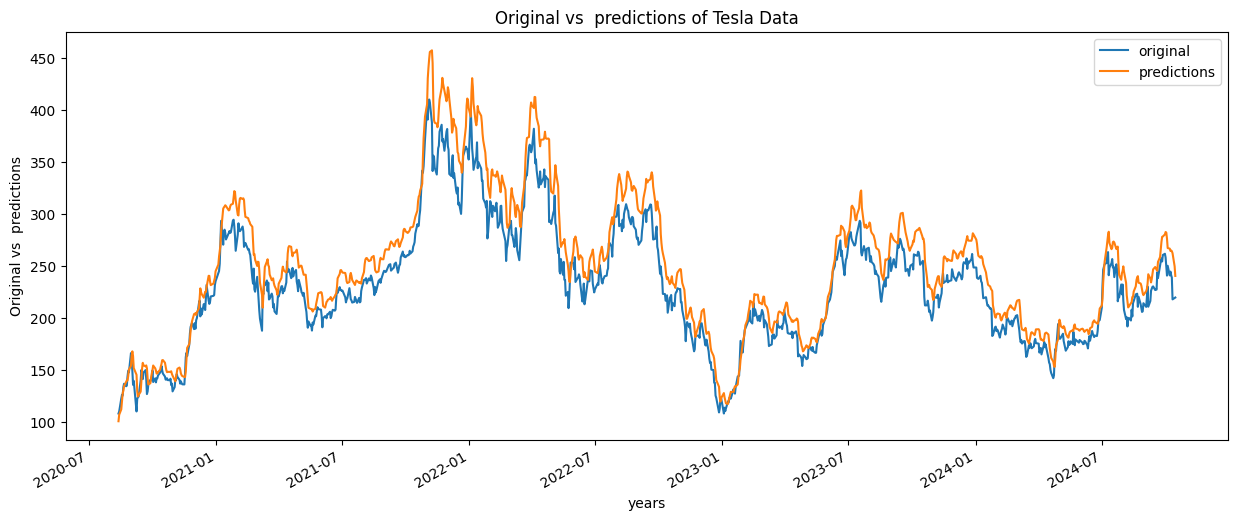

In [44]:
graphs((15,6),comparison,'Original vs  predictions')

In [45]:
final_result = pd.concat([price[:x_train_length+100],comparison], axis=0)

<Figure size 640x480 with 0 Axes>

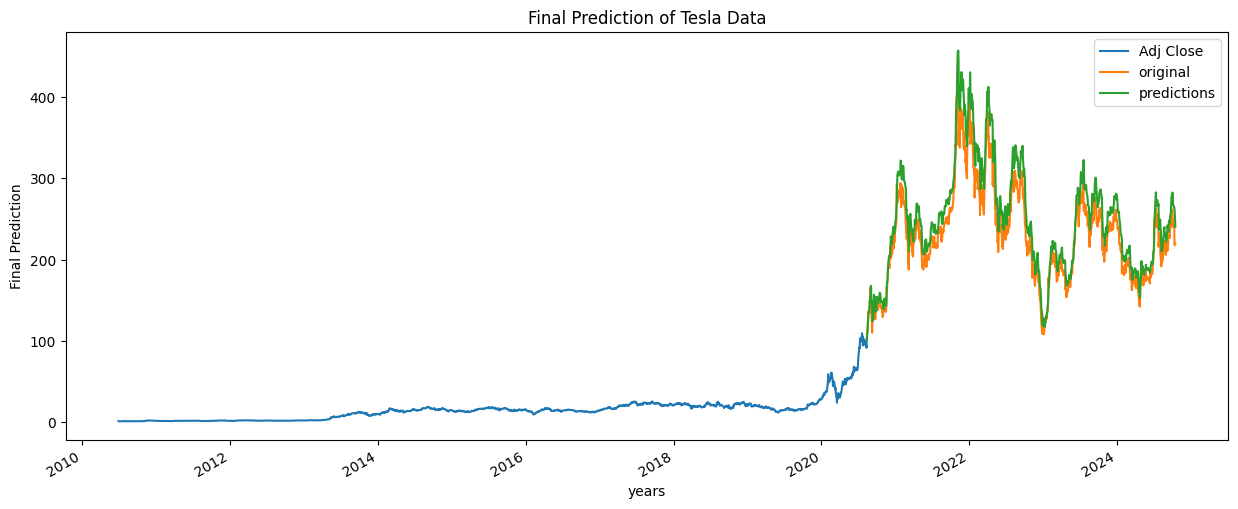

In [46]:
graphs((15,6),final_result,'Final Prediction')

## Saving Model

In [50]:
pickle.dump(model,open("stock_price_model.pkl",'wb'))